### Import ProjectShedulingModel and EventList

In [2]:
from SchedulingProblem import ProjectSchedulingModel
from EventList import EventList

### Load problem instance

In [3]:
psmodel = ProjectSchedulingModel.from_file("j30.sm/j3031_1.sm")

### Create random solution and visualization

In [3]:
solution = EventList(psmodel)
print(solution)

Event 0 at time 0, jobs: 1, 4, 3, 2
Event 1 at time 1, jobs: 7, 10
Event 2 at time 7, jobs: 6
Event 3 at time 14, jobs: 8, 15, 5
Event 4 at time 21, jobs: 17, 9, 22
Event 5 at time 30, jobs: 20, 13, 23
Event 6 at time 31, jobs: 14
Event 7 at time 37, jobs: 16, 24, 31, 19
Event 8 at time 47, jobs: 25, 28, 11
Event 9 at time 49, jobs: 27, 12
Event 10 at time 50, jobs: 18
Event 11 at time 53, jobs: 21
Event 12 at time 63, jobs: 26, 29
Event 13 at time 66, jobs: 30
Event 14 at time 72, jobs: 32



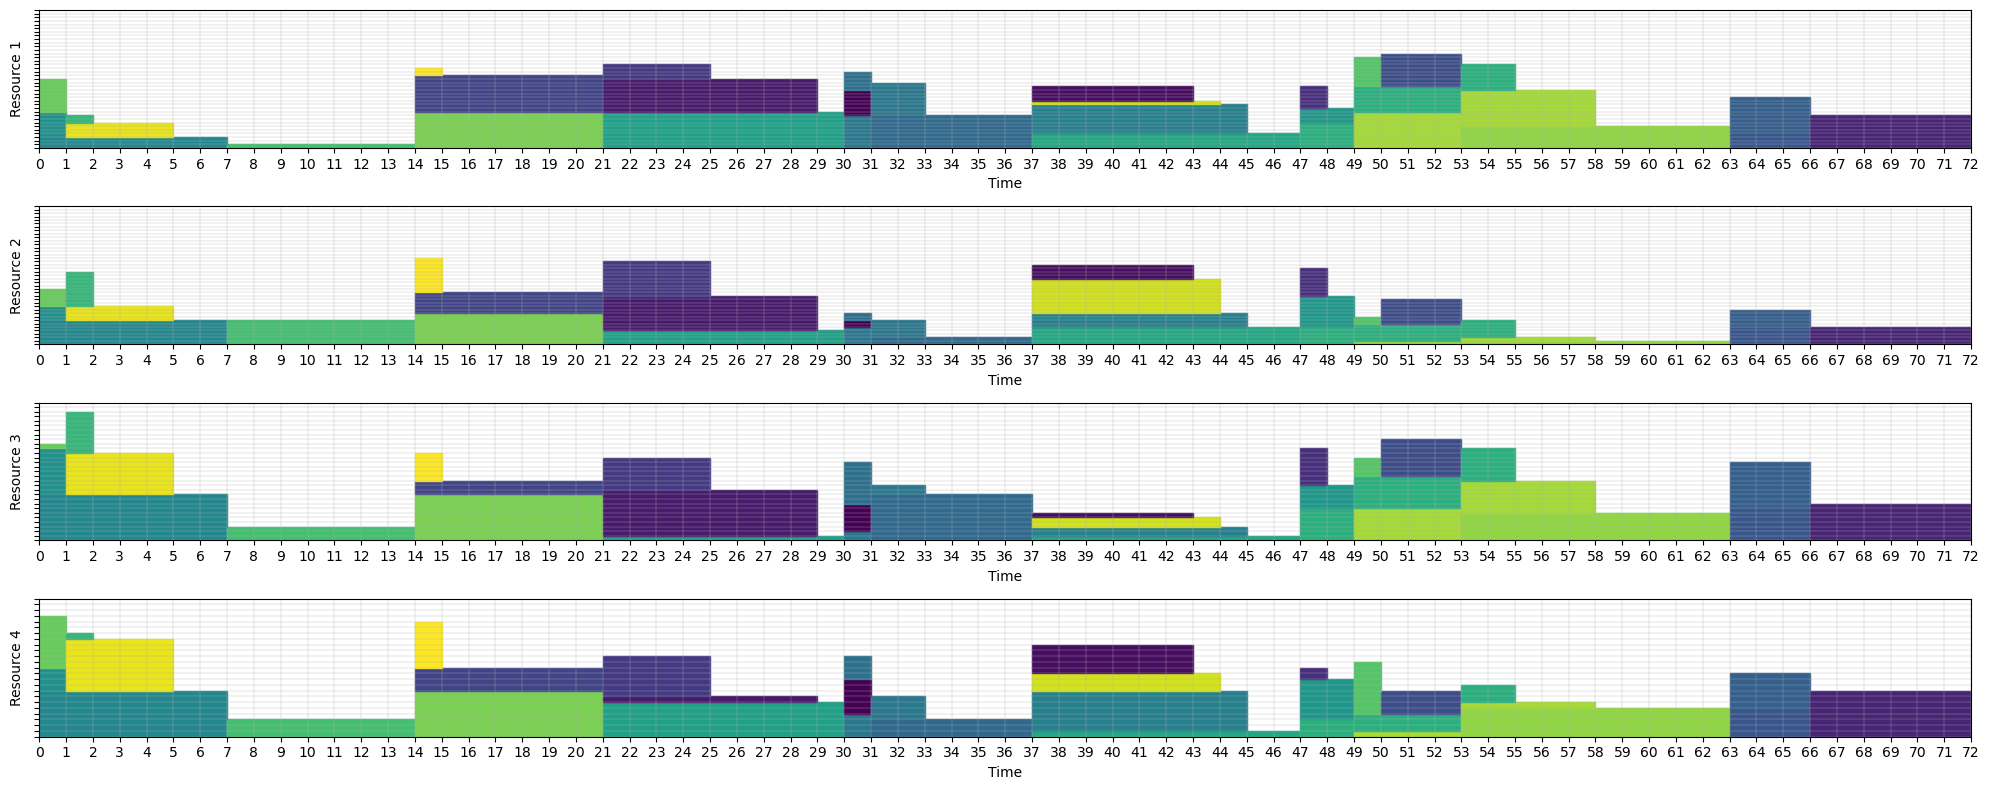

In [4]:
solution.plot()

### Validate 1000 random solutions

In [5]:
sols = [EventList(psmodel) for _ in range(1000)]
validations = [psmodel.validate_solution(sol) for sol in sols]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Validate 1000 random local solutioins

In [6]:
validations = [psmodel.validate_solution(EventList(psmodel=psmodel).generate_new_local_solution(steps=1)) for _ in range(1000)]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


In [7]:
solutions = [EventList(psmodel).generate_new_local_solution() for _ in range(1000)]
validations = [psmodel.validate_solution(sol) for sol in solutions]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Validate 1000 recombination solutions

In [8]:
validations = [psmodel.validate_solution(EventList(psmodel).recombine_solution(EventList(psmodel))) for _ in range(1000)]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


In [9]:
solutions = [EventList(psmodel).recombine_solution(EventList(psmodel)) for _ in range(1000)]
validations = [psmodel.validate_solution(sol) for sol in solutions]
print(validations.count(True), "correct solutions")
print(validations.count(False), "incorrect solutions")

1000 correct solutions
0 incorrect solutions


### Artificial Bee Colony

In [21]:
import random
import numpy as np

In [22]:
# INTIALIZE POPULATION
N = 200
limit = len(psmodel.jobs)*len(psmodel.resources.resourcesList)/2
MaxIter = 100
food_sources = [EventList(psmodel) for _ in range(N)]
updates = np.zeros(N)
best_solution = None

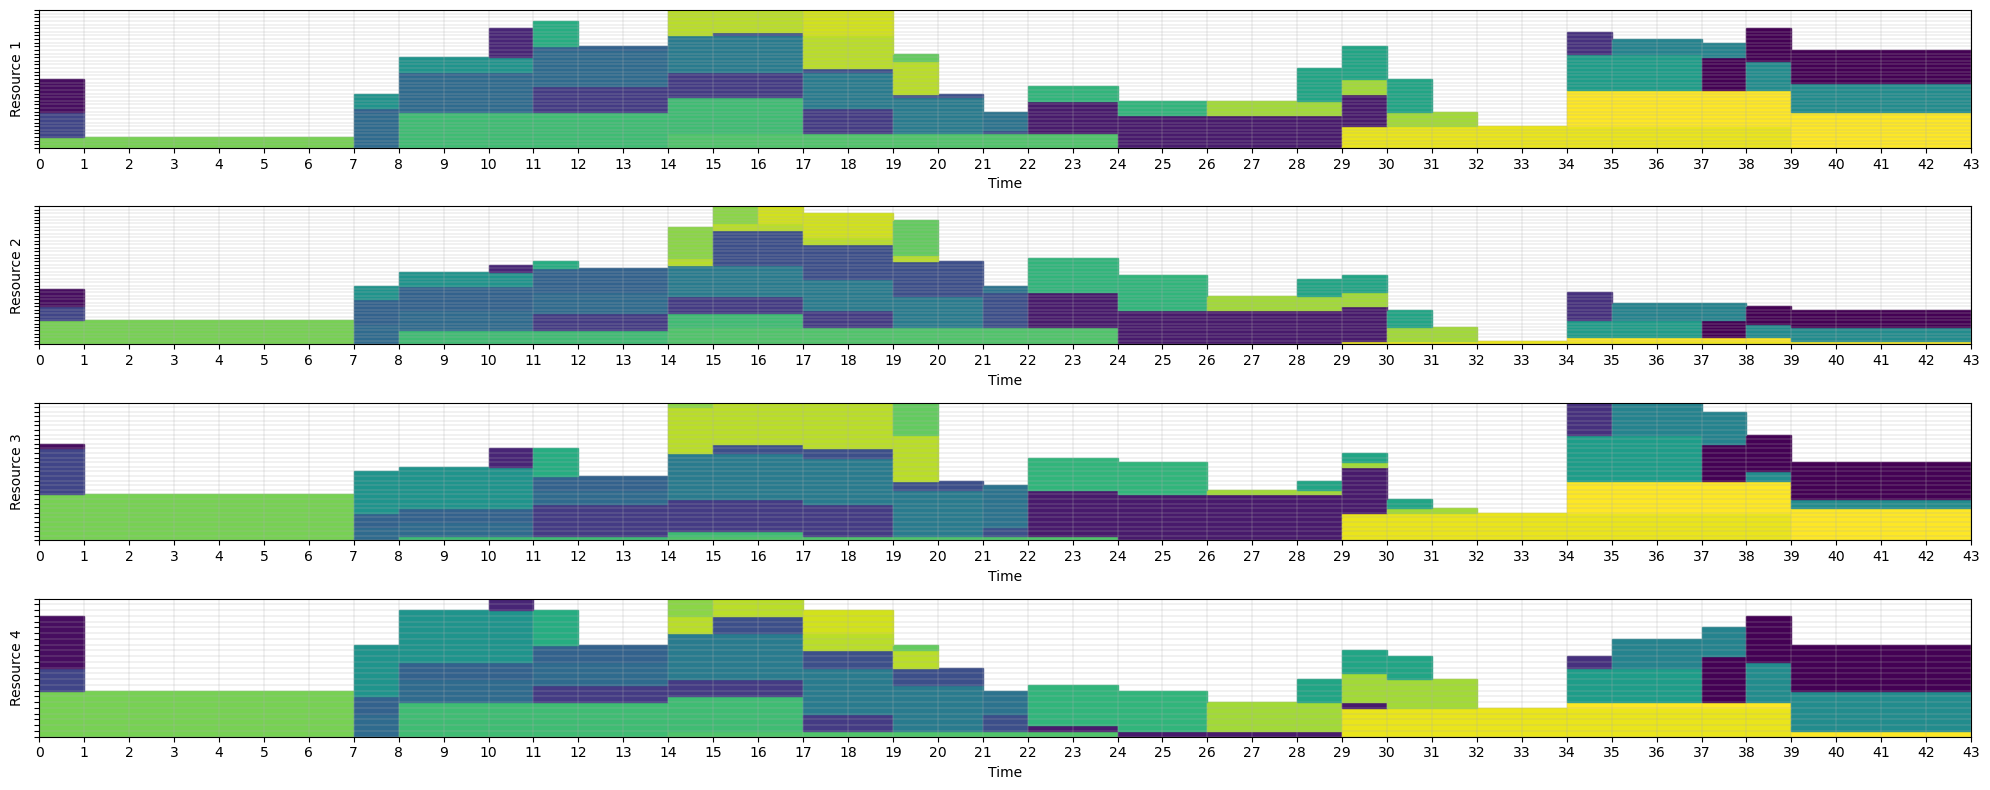

In [23]:
for j in range(100):
        
    # EMPLOYED BEE PHASE
    for i in range(N):
        updates[i] += 1
        new_solution = food_sources[i].generate_new_local_solution()
        if new_solution.get_makespan() < food_sources[i].get_makespan():
            food_sources[i] = new_solution
            updates[i] = 0
            
    # ONLOOKER BEE PHASE
    for i in range(N):
        random_indexes = random.sample(range(N), 3)
        selected = min(random_indexes, key=lambda x: food_sources[x].get_makespan())
        updates[selected] += 1
        new_solution = food_sources[selected].generate_new_local_solution()
        if new_solution.get_makespan() < food_sources[selected].get_makespan():
            food_sources[selected] = new_solution
            updates[selected] = 0
            
    iteration_best = min(food_sources, key=lambda x: x.get_makespan())
    best_solution = iteration_best if best_solution is None or iteration_best.get_makespan() < best_solution.get_makespan() else best_solution
        
    # SCOUT BEE PHASE
    selected = np.where(updates > limit)[0]
    for i in selected:
        food_sources[i] = EventList(psmodel)
        updates[i] = 0
        
best_solution.plot()